# 10-1. 퍼셉트론

✔ 로지스틱 회귀 분류기와 다르게 퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 만든다.

✔ 퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있음, 이를 다층 퍼셉트론이라고 부른다.

✔ 아래 그림과 같은 다층 퍼셉트론을 통해 XOR 문제를 해결


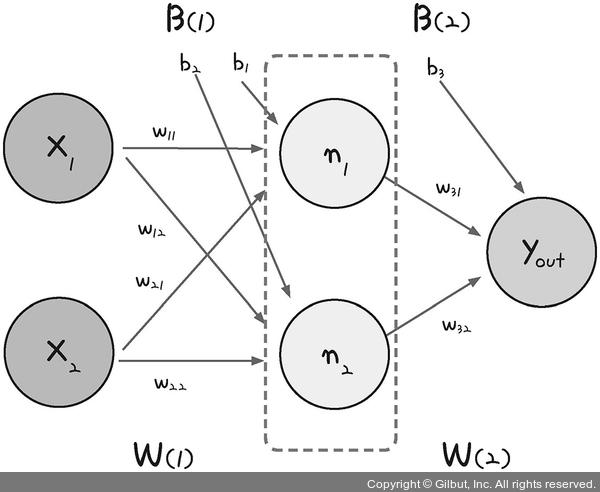

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

# 10-2. fashion mnist dataset (tensorflow -> pytorch)

✔ fashion 데이터 셋을 사용함


In [ ]:
from torchvision import datasets, transforms, utils
from torch.utils import data

transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)


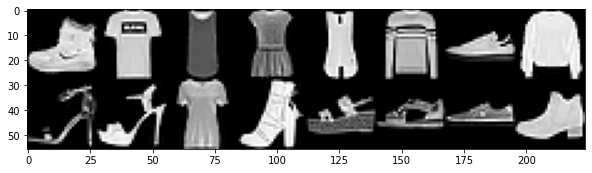

In [14]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 16

# 데이터 로딩(공급) 객체 선언
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size
)

# 반복문에서 사용할 수 있도록 iter()함수 적용
dataiter       = iter(train_loader)
# next()함수로 다음 배치 1개 갖고오기
images, labels = next(dataiter)

# 데이터 체크
# utils.make_grid : 여러 이미지를 하나로 묶어보기 위함
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [15]:
print(labels)
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])
Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


In [ ]:
✔ 핸즈온 머신러닝에서 제시한 모델 구현

In [21]:
from torch import nn

class Net(nn.Module) :
  def __init__(self) :
    super(Net, self).__init__()

    self.dense = nn.Linear(784, 300)
    self.dense_1 = nn.Linear(300, 100)
    self.dense_2 = nn.Linear(100, 10)

  def forward(self, x) :
    x = x.view(-1, 784)
    x = self.dense(x)
    x = self.dense_1(x)
    x = self.dense_2(x)

    return x

✔ 파라미터 기본 정의

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

EPOCHS = 30
BATCH_SIZE = 64

model = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

✔ train, evaluation 함수 정의하기

In [24]:
def train(model, train_loader, optimizer) :
  model.train()

  for batch_idx, (data, target) in enumerate(train_loader) :
    data, target = data.to(DEVICE), target.to(DEVICE)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()


def evaluate(model, test_loader) :
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad() : #평가과정에서는 기울기를 계산하지 않기때문에
    for data, target in test_loader :
      data, target = data.to(DEVICE), target.to(DEVICE)
      output = model(data)

      test_loss += F.cross_entropy(output, target, reduction = 'sum').item()
      pred = output.max(1, keepdim = True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    
    return test_loss, test_accuracy


✔ training 하는 함수

In [25]:
for epoch in range(1, EPOCHS + 1) :
  train(model, train_loader, optimizer)
  test_loss, test_accuracy = evaluate(model, test_loader)

  print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.4959, Accuracy: 82.32%
[2] Test Loss: 0.4775, Accuracy: 83.10%
[3] Test Loss: 0.4672, Accuracy: 83.46%
[4] Test Loss: 0.4606, Accuracy: 83.81%
[5] Test Loss: 0.4562, Accuracy: 84.05%
[6] Test Loss: 0.4530, Accuracy: 84.15%
[7] Test Loss: 0.4507, Accuracy: 84.25%
[8] Test Loss: 0.4489, Accuracy: 84.36%
[9] Test Loss: 0.4476, Accuracy: 84.41%
[10] Test Loss: 0.4466, Accuracy: 84.47%
[11] Test Loss: 0.4458, Accuracy: 84.47%
[12] Test Loss: 0.4452, Accuracy: 84.47%
[13] Test Loss: 0.4447, Accuracy: 84.44%
[14] Test Loss: 0.4444, Accuracy: 84.47%
[15] Test Loss: 0.4441, Accuracy: 84.47%
[16] Test Loss: 0.4440, Accuracy: 84.45%
[17] Test Loss: 0.4438, Accuracy: 84.44%
[18] Test Loss: 0.4438, Accuracy: 84.49%
[19] Test Loss: 0.4438, Accuracy: 84.51%
[20] Test Loss: 0.4438, Accuracy: 84.53%
[21] Test Loss: 0.4439, Accuracy: 84.49%
[22] Test Loss: 0.4439, Accuracy: 84.46%
[23] Test Loss: 0.4440, Accuracy: 84.46%
[24] Test Loss: 0.4442, Accuracy: 84.49%


KeyboardInterrupt: ignored

✔ 정확도 높이는 방법
- activation function 추가
- learning rate 조절
- optimizer 바꾸기
- dropout, earlystopping 등 적용
